This is the analysis of the chlorophyll flurometer by taking measurements 
of chlorophyll standars via rhodamine dye. These tests serve as an analysis
of the flurometers functionality for future testing. 

# Fluormeter Testing

## Fluormeter Desgin 
This fluorometer is a benchtop model with housing which positions the LED and 
the TSL2592 at a 90 degree angle as well as will be an opage design as to 
eliminate any ambient light from impacting the measurements. The TSL 2591
is fitted with a red filter. The top of the benchtop design contains a hole 
which fits a cuvette. A cuvette is placed into the flurometer with the water
sample to begin testing. Design materials an be found at:
https://github.com/COAST-Lab/Chlorophyll-Fluorometer-/tree/main/Firmware. 

## Testing Procedure 

### Step 1
A YSI instrument was calibrated to be used to verify the chlorphyll water sample
which would be prepared. Callibration information: 
https://www.ysi.com/file%20library/documents/manuals/exo-user-manual-web.pdf

### Step 2
A water sample was prepared with a chlorophyll concentration of 63.5 ug/L and 
an RFU of 15.8 RFU. This water sample was prepared with rhodamine dye and DI water



#### Chlorophyll Sample Preparation
###### Step 1
5mL of Rhodamine dye was pitpetted into a 1000mL volumetric flask or beaker. Fill 
the flask or beaker up to 1000mL mark with DI water
    
###### Step 2
Pipette 5mL of the prepared solution in step 1 into a separate 1000mL volumetric
flask or beaker. Fill this flask or beaker up to 1000mL mark with DI water. This
will be your chlorphyll water sample

###### Step 3
Verify the concentration of the prepared chlorphyll water sample with the YSI



    
### Step 3
Insert an empty cuvette into the flurometer housing. Cover the flurometer with a 
cardboard box to ensure it is in complete darkness. Modify the code to turn the LED OFF
and run for 1 minute 

### Step 4
Repeat step 3 with the LED ON 

### Step 5
Stop readings and take the empty cuvette out of the flurometer. Insert a cuvette 
filled with DI water into the flurometer. Recover with the box and run the code 
with the LED ON for one minute

### Step 6
Stop readings and take the cuvette filled with DI water out of the flurometer. 
Insert a cuvette filled with chlorphyll water solution into the flurometer. 
Recover with the box and run the code with the LED ON for one minute

### Step 7
Stop testing anf take the SD card out of the flurometer and plug it into the 
computer ot begin analysis of the data collected. 

### Step 8
This test will be perfored first with an LED intensity of 250 and a TSL 2591
gain of HIGH and then repeated with a LED intensity of 255 and a TSL 2591
gain of MAX. 


## Data Analysis 

### Graphing 
When taking measurements the TSL 2591 light sensor collects light measurememts 
of Visible, Full, IR and Lux. Data analysis will be performed on Visible, Full
and Lux. 

#### Step 1
import necessary modules

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Step 2 
import file path, .csv file and define columns. Uncomment the light catagorey that is to be analyzed 

In [12]:
# Replace with the actual file path
file_path = "/Users/jessiewynne/chla_fluorometer/chlorphyll sample tests 7.28.23/chl_test_5_gain_high_250_light_7.28.csv"

# Skip the rows with duplicate headers while reading the CSV file
df = pd.read_csv(file_path, encoding='utf-8', skiprows=[1])

# Access the 'seconds' column
seconds_values = df['Seconds'][1:]

# Access different light measurements
# visible_values = df['Visible'][1:]  # Exclude the header row
# lux_values = df['Lux'][1:]          # Exclude the header row
full_values = df['Full'][1:]        # Exclude the header row

# Convert to numeric
# visible_values = pd.to_numeric(visible_values, errors='coerce').dropna()
# lux_values = pd.to_numeric(lux_values, errors='coerce').dropna()
full_values = pd.to_numeric(full_values, errors='coerce').dropna()
x_axis = pd.to_numeric(seconds_values, errors='coerce').dropna()

# Get unique test categories from the 'Test' column
categories = df['Test'].unique()
categories = [category for category in categories if category.lower() != 'test']  # Remove 'test' from the categories

# Create dictionaries to store the light values for each category
# category_visible_dict = {}
# category_lux_dict = {}
category_full_dict = {}

#### Step 3 
calculate mean, minimum and maximum for each light measurement catagorey as well as the positive and negative errors

In [13]:
for category in categories:
    # category_visible_dict[category] = visible_values[df['Test'] == category]
    # category_lux_dict[category] = lux_values[df['Test'] == category]
    category_full_dict[category] = full_values[df['Test'] == category]

# Calculate the mean, minimum, and maximum for each category for each light measurement
# category_visible_means = np.array([np.mean(visible_vals) for visible_vals in category_visible_dict.values()])
# category_visible_mins = np.array([np.min(visible_vals) for visible_vals in category_visible_dict.values()])
# category_visible_maxs = np.array([np.max(visible_vals) for visible_vals in category_visible_dict.values()])

# category_lux_means = np.array([np.mean(lux_vals) for lux_vals in category_lux_dict.values()])
# category_lux_mins = np.array([np.min(lux_vals) for lux_vals in category_lux_dict.values()])
# category_lux_maxs = np.array([np.max(lux_vals) for lux_vals in category_lux_dict.values()])

category_full_means = np.array([np.mean(full_vals) for full_vals in category_full_dict.values()])
category_full_mins = np.array([np.min(full_vals) for full_vals in category_full_dict.values()])
category_full_maxs = np.array([np.max(full_vals) for full_vals in category_full_dict.values()])

# Calculate the positive and negative errors (distance from mean to maximum and minimum) for each light measurement
# yerr_pos_visible = np.abs(category_visible_maxs - category_visible_means)
# yerr_neg_visible = np.abs(category_visible_means - category_visible_mins)

# yerr_pos_lux = np.abs(category_lux_maxs - category_lux_means)
# yerr_neg_lux = np.abs(category_lux_means - category_lux_mins)

yerr_pos_full = np.abs(category_full_maxs - category_full_means)
yerr_neg_full = np.abs(category_full_means - category_full_mins)


#### Step 4
plot, create a scatter plot based on the light measurement being analyzed, label the y axis based on the light measurement being analyzed. Create a title thst conveys what data is 
present on the graph

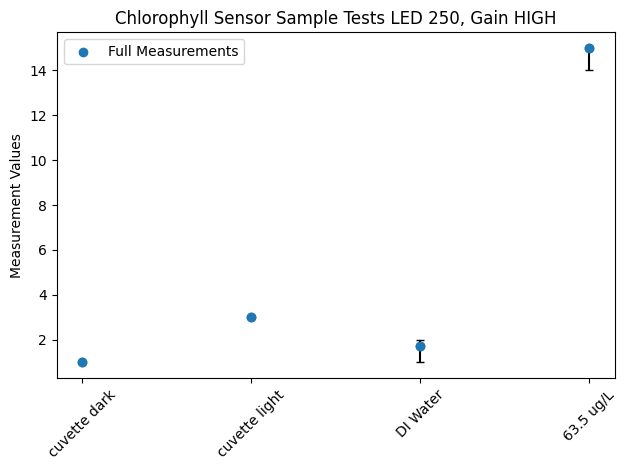

In [14]:
# Prepare data for scatter plot
x_data = np.arange(len(categories))

# Scatter plot for all visible values
# plt.scatter(x_data, category_visible_means, label='Visible Measurements')
# plt.errorbar(x_data, category_visible_means, yerr=[yerr_neg_visible, yerr_pos_visible], fmt='o', capsize=3, ecolor='black')

# # Scatter plot for all lux values
# plt.scatter(x_data, category_lux_means, label='Lux Measurements')
# plt.errorbar(x_data, category_lux_means, yerr=[yerr_neg_lux, yerr_pos_lux], fmt='o', capsize=3, ecolor='black')

# # Scatter plot for all full values
plt.scatter(x_data, category_full_means, label='Full Measurements')
plt.errorbar(x_data, category_full_means, yerr=[yerr_neg_full, yerr_pos_full], fmt='o', capsize=3, ecolor='black')
plt.ylabel('Measurement Values')
plt.title("Chlorophyll Sensor Sample Tests LED 250, Gain HIGH")

plt.xticks(x_data, labels=categories, rotation=45)

plt.legend()
plt.tight_layout()
plt.show()